<a id=top></a>

# Persistent Group Measurements
<br>

<center> <img src=img/persistent_groups_crop.png  width=80%> </center>  

<br>


## Overview


### <a href='#intro'> 1) Introduction to Persistent Groups Measurements </a>

### <a href='#imports'> 2) Imports </a>

### <a href='#load_data'> 3) Load Dataset </a>

### <a href='#instantiate'> 4) Measurement Object Instantiation </a>

### <a href='#rundown'> 5) Rundown of Persistent Groups Measurements </a>

### <a href='#questions'> 6) Bonus Exercise </a>

<a id=intro></a>

## Introduction to Persistent Groups Measurements
[Jump to top](#top)

Persistent group measurements target the behavior of small, committed groups of users working together to spread the same information or promote the same ideas to influence the rate of spread. For example, in the context of cryptocurrencies, these could be groups of users who coordinate to influence the prices or popularity (e.g., the "buzz" on social media) of cryptocurrencies.

We aim to detect groups of users propagating the same information at the same time across multiple platforms. In order to identify these groups, we construct a network of users with connections based on their propensity for sharing the same information.

We leverage the time series of total activity for each unit of information and identify bursts in activity.  For each burst, we add a link between all pairs of users that participate in the burst, where the edge weight for the link will scale inversely with the total number of users involved in the burst activity.  If users participate together in multiple bursts, their edge weight will strengthen.  Finally, we will identify groups by performing community detection on this resulting network. 

Here is an example of the network construction approach:

<centering> <img src=img/persistent_groups_explanation.png width=80%></src> </centering>

<a id=imports></a>

## Imports
[Jump to top](#top)

First, import the necessary packages. In this notebook we only require one package:

1) **socialsim** 

In [4]:
import socialsim as ss

If you were unable to install SNAP, run the cell below and then re-run the cell above to ignore the warnings about backend code switching to SNAP workarounds using python-igraph only:

In [5]:
import warnings
warnings.filterwarnings("ignore")

<a id=load_data></a>

## Load the dataset
[Jump to top](#top)

Next, load the dataset we are going to use in this notebook **tutorial_persistent_groups.json** that should be located in your **./data/** folder. 

This data should not take long to load, so we have set the **verbose** flag to **False** &mdash; if you want to see the progress updates for dataset loading, set this flag to **True** or remove it entirely (it will default to **True**).

In [6]:
dataset_path = '../data/tutorial_persistent_groups.json' 
dataset = ss.load_data(dataset_path, verbose=False)

This dataset focuses on four cryptocurrencies:

<centering> <img src=img/persistent_groups_coin_logos.png width=90%></src> </centering>

In [7]:
list(set(dataset['informationID']))

['ubiq', 'peercoin', 'tether', 'pesetacoin']

<a id=instantiate></a>

## Persistent Groups Measurements Object Instantiation
[Jump to top](#top)


Now that we have the data and configuration files loaded we can instantiate the PersistentGroupsMeasurements object and start to explore the persistent groups in this data!

We just looked at how our burst detection works in the Recurrence notebook, so we set the **plot_bursts** flag to **False**, and once again we pass **./plots/** as the directory to save our plots to.

num nodes:  703 num edges:  33487
Number of groups:  4


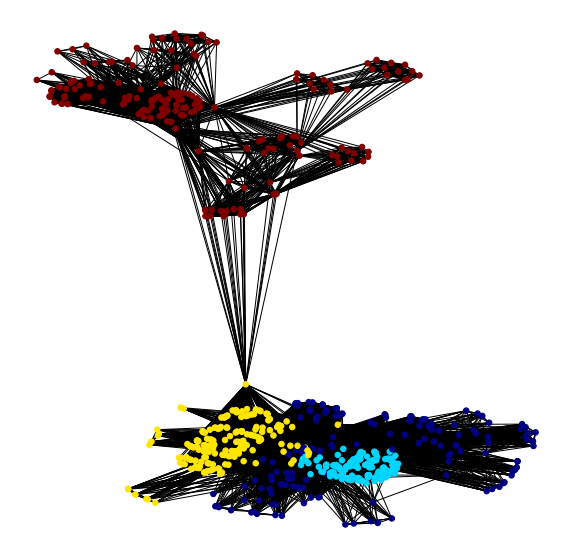

In [8]:
persistent_groups = ss.PersistentGroupsMeasurements(dataset,
                                                    plot=True, 
                                                    plot_bursts=False)

<a id=rundown></a>

## Rundown of Persistent Groups Measurements
[Jump to top](#top)


Once again, we can list all the available measurements using the **list_measurements()** call:

In [9]:
persistent_groups.list_measurements()

1) distribution_of_content_discussion_over_groups: Do groups focus on individual information IDs or a larger set of info IDs?

2) group_size_distribution: How large are the groups of users?  (population)

3) group_versus_total_volume_of_activity: How much does the most prolific group dominate the discussion of a particular info ID over time?

4) internal_versus_external_interaction_rates: How much do group members interact with each other versus non-group members?

5) number_of_groups: How many different clusters of users are there?

6) seed_post_versus_response_actions_ratio: How much does the group seed new content?



### Scalar Measurements
<br>
First, we can look at the scalar measurements of the population as a whole.

 **number_of_groups** summarizes how many clusters of users who are identified in persistent groups

In [10]:
persistent_groups.number_of_groups()

4

**external_to_internal_interaction_rate_ratio** summarizes how often members of persistent groups interact with others within the group versus users who are not members of the same group

In [11]:
persistent_groups.internal_versus_external_interaction_rates()

0.662943540148471

### Distribution Measurements
<br>
Next, we can look at the distribution-based measurements of the population as a whole:
 

**distribution_of_content_discussion_over_groups** measures whether groups focus on individual pieces of information (represented by single information IDs) or a larger set of pieces of information (represented by multiple information IDs)

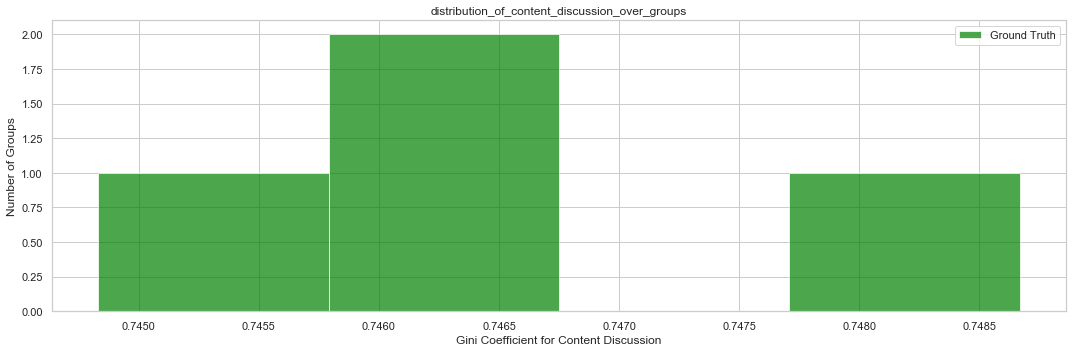

In [12]:
res = persistent_groups.distribution_of_content_discussion_over_groups()
ss.generate_plot(res, measurement_name='distribution_of_content_discussion_over_groups', show=True)

**group_size_distribution** measures how many users are in the persistent groups

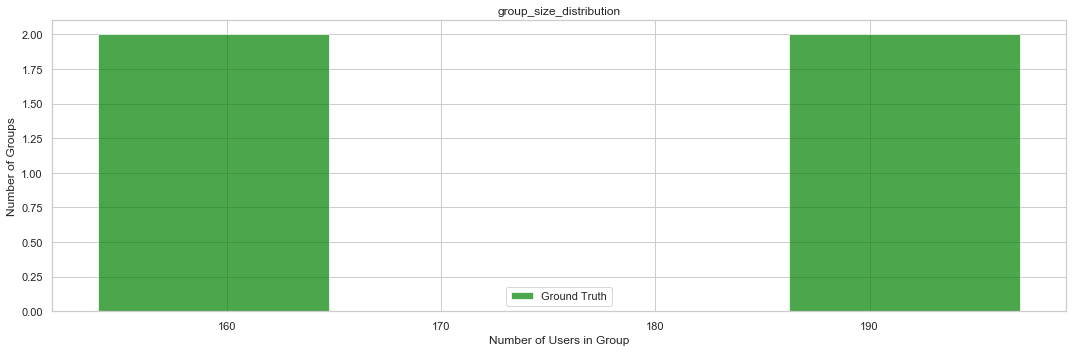

In [13]:
res = persistent_groups.group_size_distribution()
ss.generate_plot(res, measurement_name='group_size_distribution', show=True)

**seed_post_versus_response_actions_ratio** measures how much the groups seeds new content about the piece(s) of information

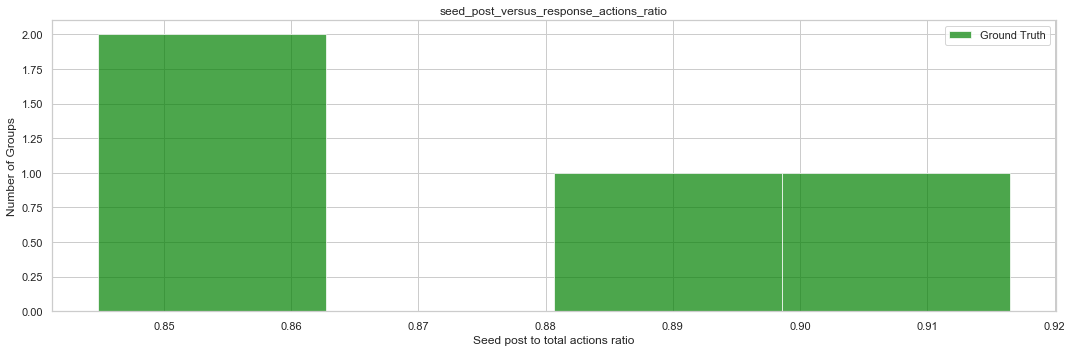

In [14]:
res = persistent_groups.seed_post_versus_response_actions_ratio()
ss.generate_plot(res, measurement_name='seed_post_versus_response_actions_ratio', show=True)

### Temporal Measurements
<br>
Finally, we can look at temporal measurements at a node-level (individual pieces of information):
 

**group_versus_total_volume_of_activity** measures how much the most prolific group dominates the discussion of particular pieces of information over time.

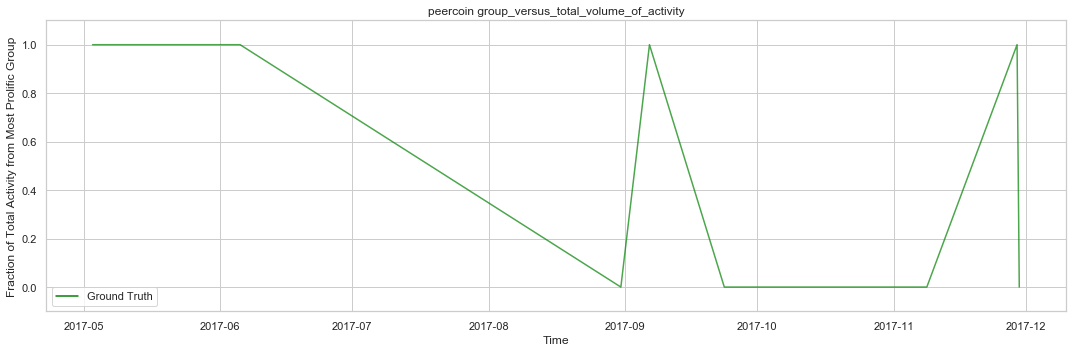

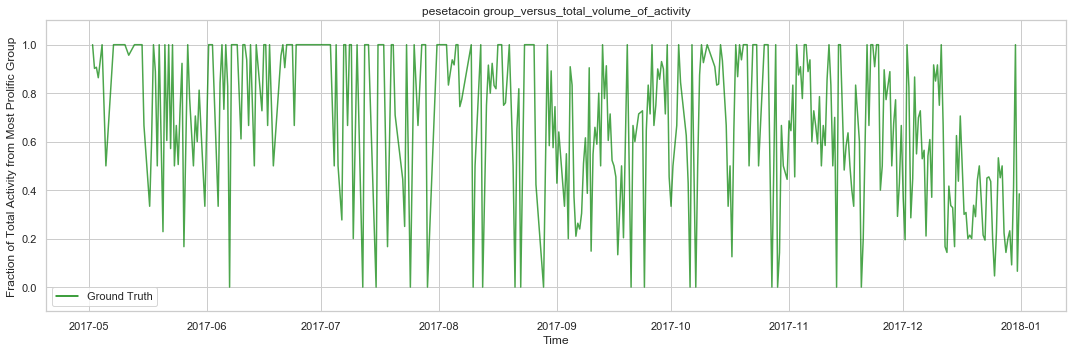

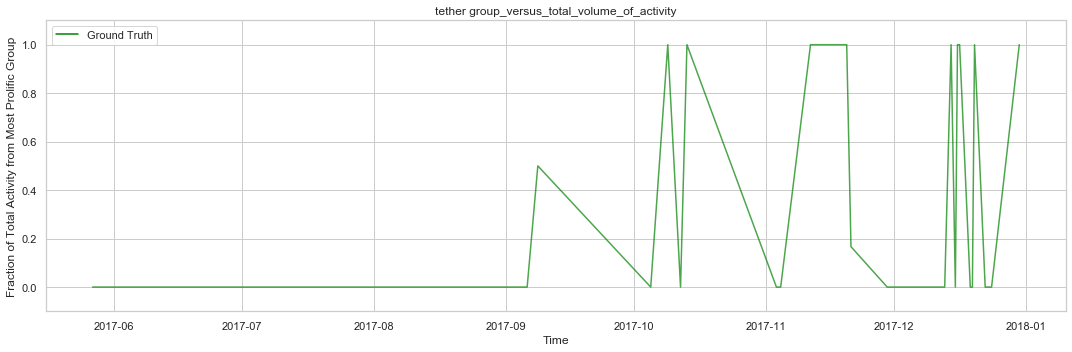

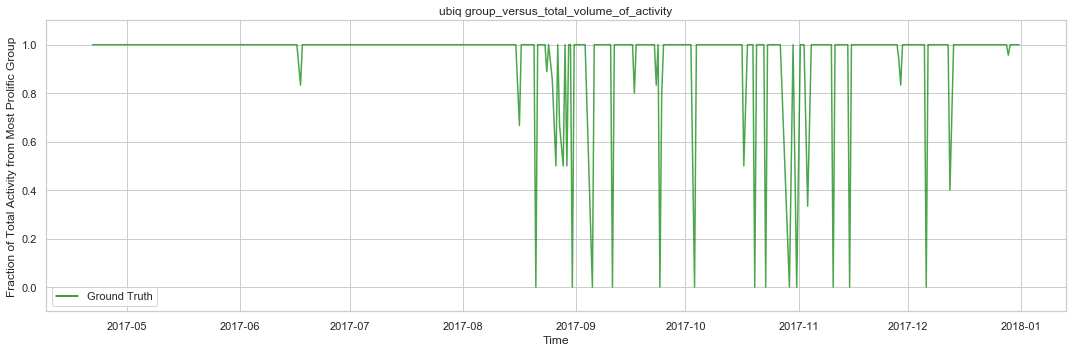

In [15]:
res = persistent_groups.group_versus_total_volume_of_activity()
ss.generate_plot(res, measurement_name='group_versus_total_volume_of_activity', show=True, ymin=-0.1, ymax=1.1)


<a id=questions></a>

## Bonus Exercise
[Jump to top](#top)


What happens if we focus on just __2__ of our coins of interest? 

Let's say we were only interested in **pesetacoin** (a spanish cryptocurrency emerging as an alternative to Bitcoin in Spain, read more <a href=https://coinswitch.co/info/pesetacoin/what-is-pesetacoin>here</a>) and **tether** (a cryptocurrency that some cryptocurrency insiders claim "is being used to prop up the price of bitcoin", read more <a href=https://www.cnbc.com/2018/02/02/tether-what-you-need-to-know-about-the-cryptocurrency-worrying-markets.html>here</a>).

<centering> <img src=img/persistent_groups_coins_details.png width=100%></src> </centering>


In [16]:
bonus_dataset_path = '../data/tutorial_persistent_groups_bonus.json' 
bonus_dataset = ss.load_data(bonus_dataset_path, verbose=False)

In [17]:
print('There are two informationIDs in this bonus dataset: ',set(bonus_dataset['informationID']))

There are two informationIDs in this bonus dataset:  {'tether', 'pesetacoin'}



How do the population-level measurements change? Choose two of the population-level measurements to rerun with **subset_dataset**: